To do: 
- Separar dones (outliers)
- Freesframe convertir en paràmatre Tubert-Mercader
- Freesframe convertir a característiques

In [914]:
import json
import os
import csv
import math
import ast 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
path = 'C:/Users/Joan/Desktop/MatCAD/3r/Apren. Comput/open-data-master/open-data-master/data/events'
event_files = []
all_files = os.listdir(path)

for i in range(0, len(all_files), 10):
    nom = os.path.join(path, all_files[i])
    if os.path.isfile(nom):
        event_files.append(nom)

# Archivo de salida CSV
output_csv = 'C:/Users/Joan/Desktop/MatCAD/3r/Apren. Comput/open-data-master/open-data-master/shots_data.csv'

# Centro de la portería y campos de interés
goal_center = [120, 40]
fields = [
    'event_id', 'period', 'minute','team',
    'player', 'location', 'shot_distance',
    'shot_angle', 'body_part', 'play_pattern', 'freeze_frame', 
    'technique', 'statsbomb_xg', 'type', 'aerial_won', 'open_goal'
]

with open(output_csv, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fields)
    writer.writeheader()

    for file_path in event_files:
        with open(file_path, 'r', encoding='utf-8') as f:
            events = json.load(f)
            
            match_id = os.path.basename(file_path).replace('.json', '')
            
            for event in events:
                if event.get('type', {}).get('name') == 'Shot':
                    location = event.get('location')
                    aerial_won=event.get('shot', {}).get('aerial_won')
                    open_goal= event.get('shot',{}).get('open_goal')
                    freeze_frame=event.get('shot', {}).get('freeze_frame')
                    if location:
                        # Calcular distancia euclidiana a la portería (hipotenusa)
                        shot_distance = math.sqrt((goal_center[0] - location[0]) ** 2 + (goal_center[1] - location[1]) ** 2)
                        
                        # Calcular distancia horizontal (lado adyacente)
                        adj_side = abs(goal_center[0] - location[0])
                        
                        # Calcular ángulo del tiro usando el arcocoseno
                        if shot_distance != 0:
                            shot_angle = math.degrees(math.acos(adj_side / shot_distance))
                        else:
                            shot_angle = None
                    else:
                        shot_distance = None
                        shot_angle = None
                    if aerial_won:
                        aerial_won=1
                    else:
                        aerial_won=0
                    if open_goal:
                        open_goal=1
                    else:
                        open_goal=0 
                    if (freeze_frame is None)or (type(freeze_frame)==list and len(freeze_frame)==0):
                        freeze_frame=0
                    else:
                        freeze_frame=freeze_frame

                    shot_data = {
                        'event_id': event.get('id'),
                        'period': event.get('period'),
                        'minute': event.get('minute'),
                        'team': event.get('team', {}).get('name'),
                        'player': event.get('player', {}).get('name'),
                        'location': location,
                        'shot_distance': shot_distance,
                        'shot_angle': shot_angle,
                        'body_part':event.get('shot', {}).get('body_part', {}).get('name'),
                        'play_pattern': event.get('play_pattern', {}).get('name'),
                        'freeze_frame': freeze_frame,
                        'technique': event.get('shot', {}).get('technique', {}).get('name'),
                        'statsbomb_xg': event.get('shot', {}).get('statsbomb_xg'),
                        'type': event.get('shot', {}).get('type', {}).get('name'),
                        'aerial_won': aerial_won,
                        'open_goal': open_goal
                    }
                    
                    writer.writerow(shot_data)

print(f"Datos de remates extraídos y guardados en {output_csv}")




Datos de remates extraídos y guardados en C:/Users/Joan/Desktop/MatCAD/3r/Apren. Comput/open-data-master/open-data-master/shots_data.csv


In [915]:
#TO DO: EXPLICAR EL MOTIU DE ast.literal_eval

In [916]:
import pandas as pd
import ast

# Cargar el archivo CSV
output_csv = 'C:/Users/Joan/Desktop/MatCAD/3r/Apren. Comput/open-data-master/open-data-master/shots_data.csv'
df = pd.read_csv(output_csv)

# Convertir la columna freeze_frame de cadena a lista o diccionario
def convert_freeze_frame(value):
    try:
        # Intentar evaluar el string como un objeto Python (lista o dict)
        if value == "0":  # Si el valor fue preprocesado como '0', devolver None o lista vacía
            return []
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        # Si no es posible convertir, devolver None
        return None

# Aplicar la conversión a toda la columna freeze_frame
df['freeze_frame'] = df['freeze_frame'].apply(convert_freeze_frame)

# Verificar resultados
print(df['freeze_frame'].head())
element=df['freeze_frame'][0]
print(element,type(element))

0    [{'location': [91.1, 50.2], 'player': {'id': 6...
1    [{'location': [108.1, 36.8], 'player': {'id': ...
2    [{'location': [95.3, 35.2], 'player': {'id': 6...
3    [{'location': [102.8, 31.5], 'player': {'id': ...
4    [{'location': [109.0, 27.2], 'player': {'id': ...
Name: freeze_frame, dtype: object
[{'location': [91.1, 50.2], 'player': {'id': 6632, 'name': 'Manuel Alejandro García Sánchez'}, 'position': {'id': 15, 'name': 'Left Center Midfield'}, 'teammate': False}, {'location': [93.2, 43.7], 'player': {'id': 6839, 'name': 'Daniel Alejandro Torres Rojas'}, 'position': {'id': 10, 'name': 'Center Defensive Midfield'}, 'teammate': False}, {'location': [82.9, 59.5], 'player': {'id': 6581, 'name': 'Jonathan Rodríguez Menéndez'}, 'position': {'id': 16, 'name': 'Left Midfield'}, 'teammate': False}, {'location': [103.0, 44.8], 'player': {'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}, 'position': {'id': 22, 'name': 'Right Center Forward'}, 'teammate': True}, {'location': [95.4, 53.4]

In [917]:
#TO DO: EXPLICAR CALCUL DELS ANGLES DELS RIVALS RESPECTE LA PILOTA DEL JUGADOR QUE REMATA I DE LA DISTANCIA

In [918]:
import math
import pandas as pd
import ast

# Función para calcular la distancia euclidiana entre dos puntos
def calcular_distancia(punto1, punto2):
    return math.sqrt((punto2[0] - punto1[0]) ** 2 + (punto2[1] - punto1[1]) ** 2)

# Función para calcular el ángulo entre dos puntos respecto a un origen
def calcular_angulo(origen, punto1, punto2):
    vector1 = (punto1[0] - origen[0], punto1[1] - origen[1])
    vector2 = (punto2[0] - origen[0], punto2[1] - origen[1])
    producto_escalar = vector1[0] * vector2[0] + vector1[1] * vector2[1]
    magnitud1 = math.sqrt(vector1[0] ** 2 + vector1[1] ** 2)
    magnitud2 = math.sqrt(vector2[0] ** 2 + vector2[1] ** 2)
    if magnitud1 == 0 or magnitud2 == 0:
        return None
    cos_angulo = producto_escalar / (magnitud1 * magnitud2)
    angulo = math.acos(max(min(cos_angulo, 1), -1))  # Asegura que el valor esté en el rango [-1, 1]
    return math.degrees(angulo)

A continuació, ens hem adonat que la característica freeze_frame és molt carregosa, ja que conté diverses informacions sobre cadascun dels rivals en el moment del xut. Com que inclou molta informació irrellevant, per reduir la dimensionalitat del dataset hem ideat un coeficient que substitueix freeze_frame. Aquest coeficient considera la distància entre el punt de xut i cadascun dels jugadors rivals de manera regulada. Per exemple, es calcula de forma exponencial, de manera que les distàncies grans tenen molt menys pes. A més, hem decidit incorporar-hi una constant arbitrària d0, que regula els valors de la funció. Aquesta constant es pot ajustar posteriorment, tractant-la com un hiperparàmetre del model.

In [919]:
d0=100
def calcul_coeficient_Tubert_Mercader(d0):
    llista_coeficients = []
    for idx, row in df.iterrows():  # Iterem sobre les files del DataFrame
        coeficient_Tubert_Mercader = 0
        punt_xutador = ast.literal_eval(row['location'])  # Accedim a la ubicació del jugador
        freeze_frame = row['freeze_frame']
        
        for jugador in freeze_frame:  # Iterem sobre els jugadors a freeze_frame
            if not jugador.get('teammate', True):
                punt_rival = jugador['location']
                if (punt_rival[0]+2>punt_xutador[0] or calcular_distancia(punt_xutador,punt_rival)<2): 
                    dist = calcular_distancia(punt_xutador, punt_rival)
                    coeficient_Tubert_Mercader += math.exp(-dist/d0) #Calculem el coeficient per a cada rival
        llista_coeficients.append(coeficient_Tubert_Mercader/11)
    
    # Cambiem el nom a la columna 'freeze_frame' a coeficientTM i substituim els valors
    df['freeze_frame'] = llista_coeficients
    df.rename(columns={'freeze_frame': 'coeficientTM'}, inplace=True)
    return [llista_coeficients]

a = calcul_coeficient_Tubert_Mercader(d0)
print(df.head())


                               event_id  period  minute              team  \
0  becd7956-ce44-479e-8fc9-16a2d1f1f349       1       2         Barcelona   
1  9107d374-2942-4876-a14f-1b9f86901c15       1       5         Barcelona   
2  ddd194ca-08fb-43d0-87c2-33647f975f9f       1      15         Barcelona   
3  86596ddb-d824-4e5e-b18c-b4442e9ce7cf       1      16  Deportivo Alavés   
4  3ed2b107-be17-42d5-9d1b-25006a0e55cb       1      18         Barcelona   

                           player       location  shot_distance  shot_angle  \
0  Lionel Andrés Messi Cuccittini  [111.5, 52.9]      15.448625   56.618524   
1                Jordi Alba Ramos  [113.9, 26.4]      14.905368   65.842363   
2  Lionel Andrés Messi Cuccittini   [93.7, 34.7]      26.828716   11.393698   
3           Rubén Sobrino Pozuelo  [109.2, 39.1]      10.837435    4.763642   
4        Luis Alberto Suárez Díaz  [107.8, 24.7]      19.568597   51.431645   

    body_part   play_pattern  coeficientTM    technique  stats

In [920]:
#NaNs columna 
missing_values = df.isnull().sum()
print(missing_values)

event_id         0
period           0
minute           0
team             0
player           0
location         0
shot_distance    0
shot_angle       0
body_part        0
play_pattern     0
coeficientTM     0
technique        0
statsbomb_xg     0
type             0
aerial_won       0
open_goal        0
dtype: int64


In [921]:
print (df.dtypes)

event_id          object
period             int64
minute             int64
team              object
player            object
location          object
shot_distance    float64
shot_angle       float64
body_part         object
play_pattern      object
coeficientTM     float64
technique         object
statsbomb_xg     float64
type              object
aerial_won         int64
open_goal          int64
dtype: object


In [922]:
numeric_features = df.select_dtypes(include=np.number).keys()
non_numeric = [col for col in df.columns if col not in numeric_features]
label_encoders = {}
for col in non_numeric:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(df.dtypes)


event_id           int32
period             int64
minute             int64
team               int32
player             int32
location           int32
shot_distance    float64
shot_angle       float64
body_part          int32
play_pattern       int32
coeficientTM     float64
technique          int32
statsbomb_xg     float64
type               int32
aerial_won         int64
open_goal          int64
dtype: object


In [923]:
###ENTRENAMENT MODEL#####
#Separem X i Y
target_att = 'statsbomb_xg'
attributes = [k for k in df.keys() if k!= target_att]
X = df[attributes]
y = df[[target_att]]

lr = LinearRegression(fit_intercept = True)
lr.fit(X,y)

LinearRegression()

In [924]:
y_pred = lr.predict(X)

from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print (r2)

0.5823912810405548


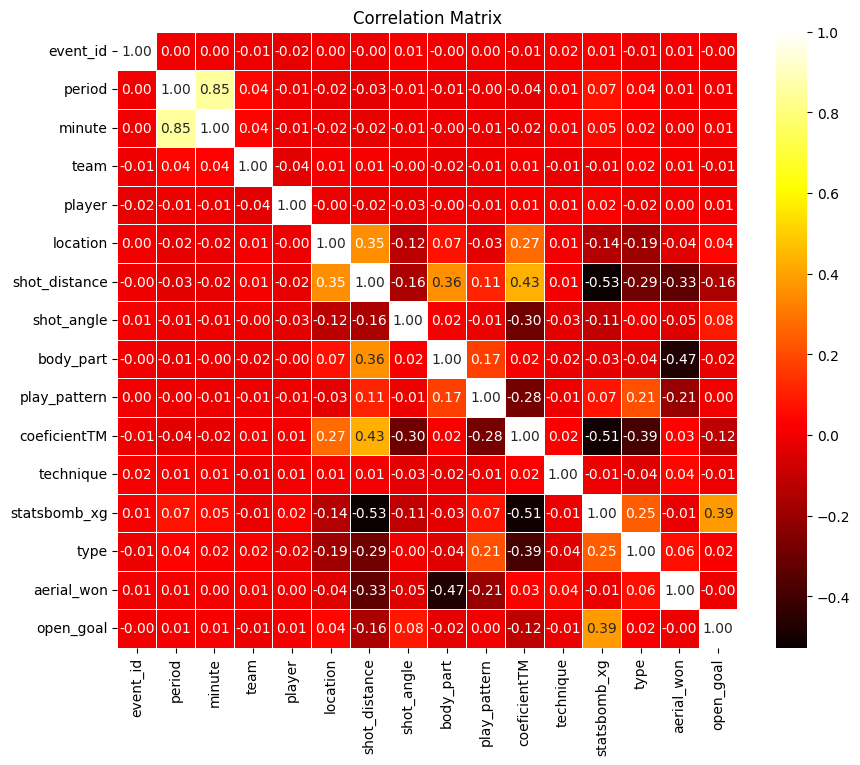

In [925]:
# Matriu de correlació
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='hot', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

c:\Users\Joan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


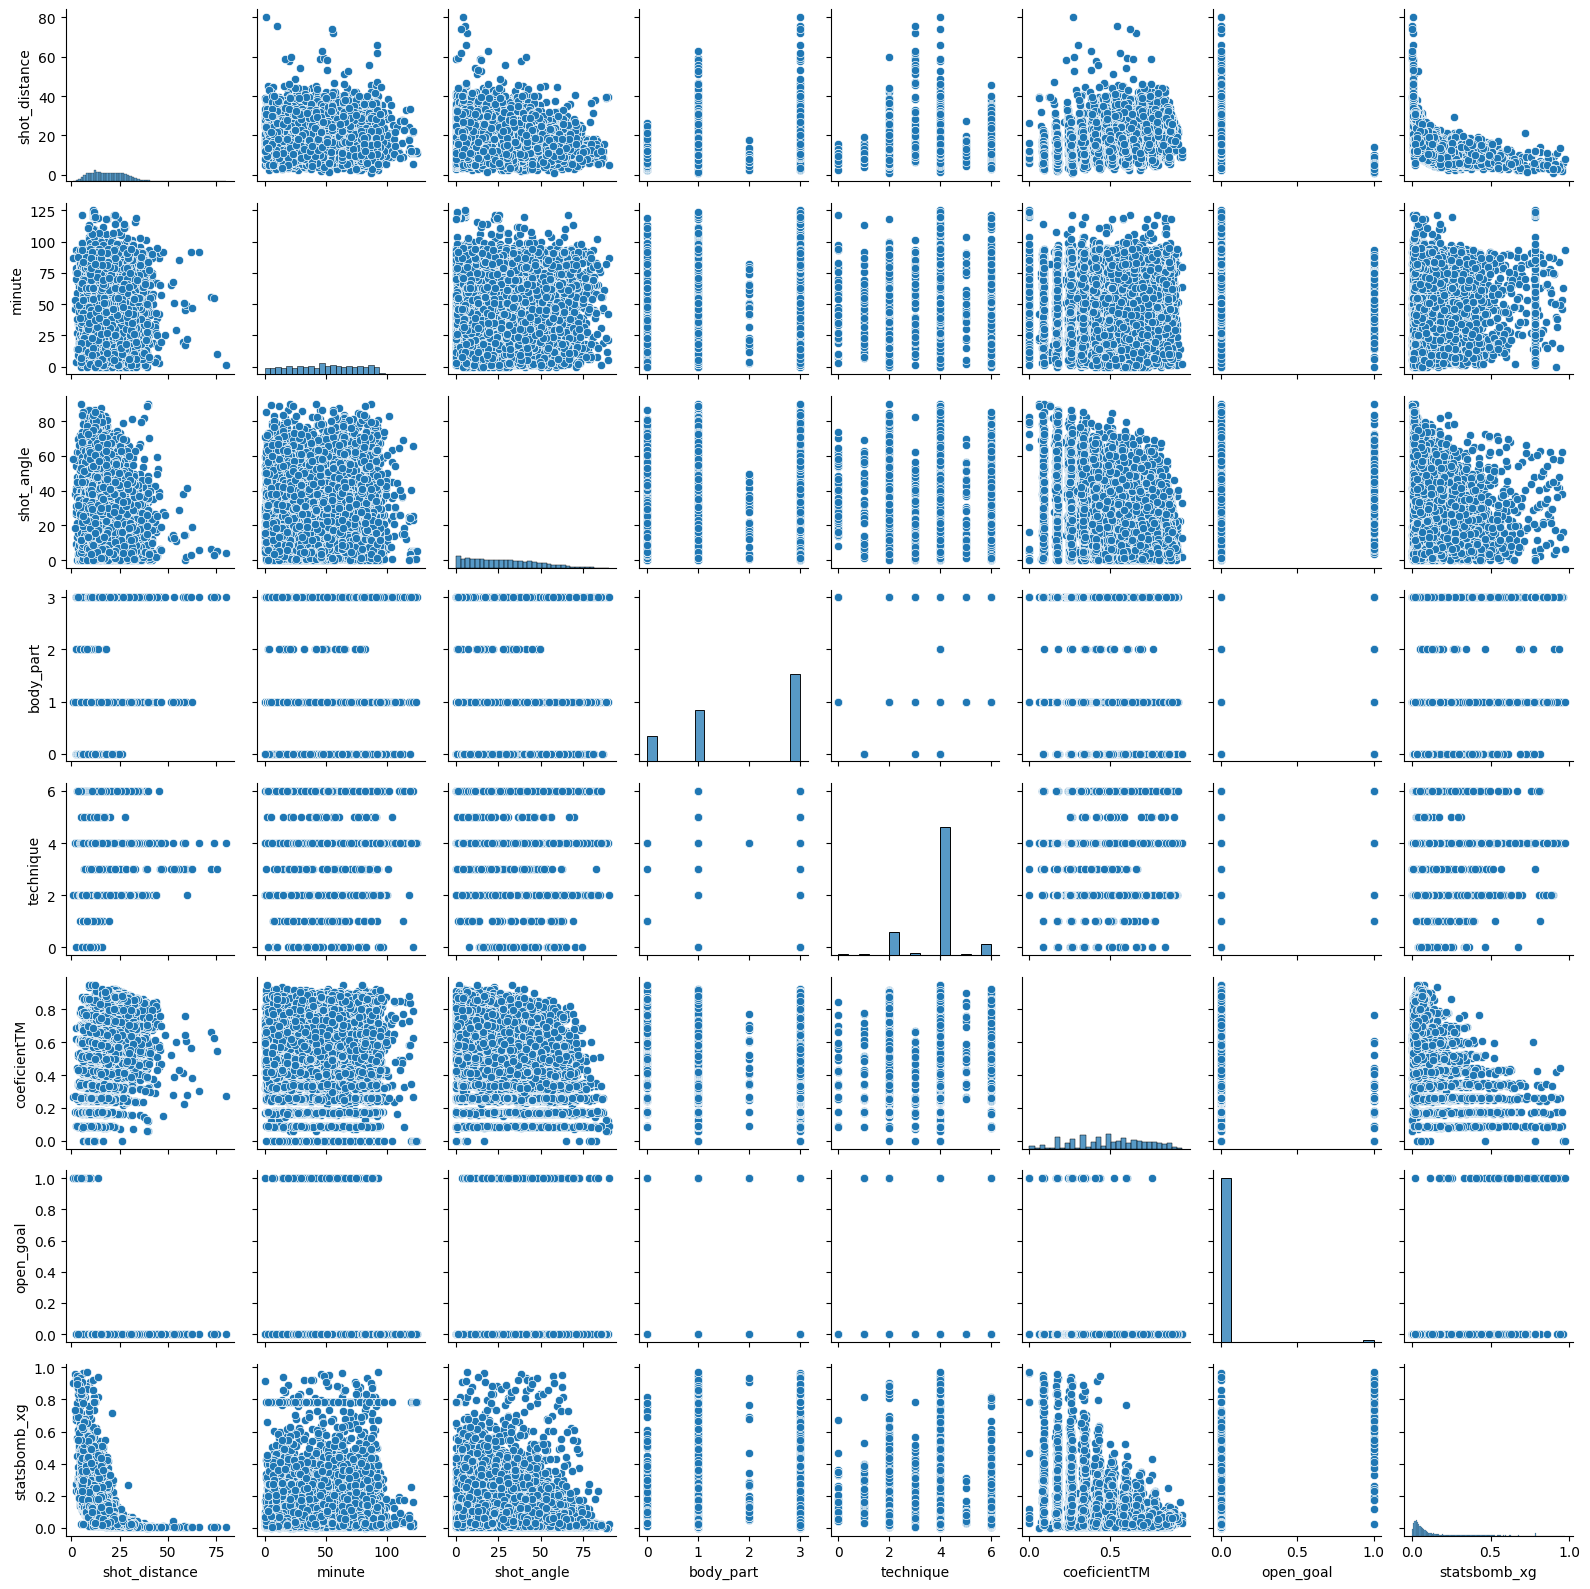

In [926]:
cols=['shot_distance','minute',

    'shot_angle', 'body_part',

    'technique', 'coeficientTM','open_goal','statsbomb_xg',]

sns.pairplot(df[cols], size=2)

plt.tight_layout()

plt.show()

In [927]:
df.drop('player', axis=1, inplace=True)
df.drop('event_id', axis=1, inplace=True)
df.drop('team', axis=1, inplace=True)
df.drop('period', axis=1, inplace=True)

In [928]:
df['shot_distance']=np.log(df['shot_distance'])
print(df['shot_distance'].head(10))

0    2.737520
1    2.701721
2    3.289473
3    2.383006
4    2.973926
5    2.815247
6    2.039954
7    3.283343
8    2.036731
9    3.001029
Name: shot_distance, dtype: float64


In [929]:
###ENTRENAMENT MODEL#####
#Separem X i Y
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split

target_att = 'statsbomb_xg'
attributes = [k for k in df.keys() if k!= target_att]
lr = LinearRegression(fit_intercept = True)

X = df[attributes]
y = df[[target_att]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

print (r2_train,r2_test)

0.6167290399392457 0.6157306844119017


Provem ara de calcular els r2scores després d'aplicar normalització de les dades.

In [930]:
scaler = StandardScaler()
columns_to_normalize = ['minute', 'location', 'shot_distance', 'shot_angle', 'coeficientTM']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print(df[['minute', 'location', 'shot_distance', 'shot_angle', 'coeficientTM']].head())

     minute  location  shot_distance  shot_angle  coeficientTM
0 -1.741944 -0.148700      -0.203965    1.514853     -1.534255
1 -1.631025  0.221968      -0.274555    2.002408     -1.559305
2 -1.261293  1.090136       0.884416   -0.875645      0.367744
3 -1.224319 -0.508266      -0.903020   -1.226097     -1.132261
4 -1.150373 -0.758510       0.262198    1.240685      0.544585


In [931]:
target_att = 'statsbomb_xg'
attributes = [k for k in df.keys() if k!= target_att]
lr = LinearRegression(fit_intercept = True)

X = df[attributes]
y = df[[target_att]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.42)

lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

print (r2_train,r2_test)

0.616244859381477 0.6154972859234407


In [932]:
from sklearn.metrics import mean_squared_error

# MSE per a la regresió lineal
mse_train_linear = mean_squared_error(y_train, y_pred_train)
mse_test_linear = mean_squared_error(y_test, y_pred_test)

print(f"MSE Train (Linear Regression): {mse_train_linear}")
print(f"MSE Test (Linear Regression): {mse_test_linear}")

MSE Train (Linear Regression): 0.008210501806549694
MSE Test (Linear Regression): 0.008476959241292905


In [933]:
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_poly, y_train)

y_pred_train = lr.predict(X_train_poly)
y_pred_test = lr.predict(X_test_poly)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Train: {r2_train}, R2 Test: {r2_test}') 

R2 Train: 0.852010538271433, R2 Test: 0.8328537026280624


In [934]:
# Calcular MSE per a la regresió polinómica
mse_train_poly = mean_squared_error(y_train, y_pred_train)
mse_test_poly = mean_squared_error(y_test, y_pred_test)

print(f"MSE Train (Polynomial Regression): {mse_train_poly}")
print(f"MSE Test (Polynomial Regression): {mse_test_poly}")

MSE Train (Polynomial Regression): 0.003230816770475847
MSE Test (Polynomial Regression): 0.0035845397645351417


In [935]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=None, 
    random_state=42,    
    n_jobs=-1             
)

rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"R² Train: {r2_train:.4f}, R² Test: {r2_test:.4f}")
print(f"MSE Train: {mse_train:.4f}, MSE Test: {mse_test:.4f}")


c:\Users\Joan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² Train: 0.9792, R² Test: 0.8217
MSE Train: 0.0005, MSE Test: 0.0035


In [936]:
y_array = y.values.ravel()

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False) 
r2_scorer = make_scorer(r2_score)

cv_mse_scores = cross_val_score(rf_model, X, y_array, cv=20, scoring=mse_scorer, n_jobs=-1)
cv_mse_scores = -cv_mse_scores 

cv_r2_scores = cross_val_score(rf_model, X, y_array, cv=20, scoring=r2_scorer, n_jobs=-1)

mean_mse = cv_mse_scores.mean()
mean_r2 = cv_r2_scores.mean()

print("Cross-Validation Results:\n")
print(f"MSE Scores: {cv_mse_scores}")
print(f"Mean MSE: {mean_mse:.4f}")
print()
print(f"R² Scores: {cv_r2_scores}")
print(f"Mean R²: {mean_r2:.4f}")

Cross-Validation Results:

MSE Scores: [0.00339568 0.00276866 0.00286881 0.00346847 0.0021917  0.00506812
 0.00363504 0.00329753 0.00499286 0.00261288 0.00361394 0.00192113
 0.00354752 0.00235705 0.00382279 0.00324554 0.00272012 0.00185393
 0.00362577 0.00492924]
Mean MSE: 0.0033

R² Scores: [0.86667961 0.83914063 0.84030684 0.83298781 0.86304251 0.77668836
 0.79676425 0.87003326 0.77798136 0.86273538 0.85635744 0.88431487
 0.8561203  0.89871268 0.80842713 0.86928898 0.89115178 0.92873871
 0.84419136 0.73511416]
Mean R²: 0.8449


In [938]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separar en características (X) y objetivo (y)
X = df[attributes]  # Asegúrate de que 'attributes' contiene las variables relevantes
y = df[[target_att]]  # Esto sigue siendo la probabilidad de gol (statsbomb_xg)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Árbol de Decisión para regresión
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
decision_tree.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento y prueba
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

# Evaluar el modelo con R²
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Evaluar el modelo con MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Mostrar los resultados
print(f'R² Train: {r2_train}')
print(f'R² Test: {r2_test}')
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')

R² Train: 0.7765044047524143
R² Test: 0.7368611063935824
MSE Train: 0.004884550585849714
MSE Test: 0.00558829935264546


In [937]:
#Com podem veure, el fet que alguns remats tinguéssin NaNs a freeze_frame es deu a que es tracta de penals (on el realitzador no té cap jugador que el pugui condicionar.)